In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from wordcloud import WordCloud


In [141]:
df = pd.read_csv("bestsellers with categories.csv")

In [88]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'

df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" "))

punctuations = string.punctuation

In [90]:
def count_punc(text):
    count = sum(1 for char in text if char in punctuations)
    return round(count / (len(text) - text.count(" ")) * 100, 3)
    

In [92]:
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

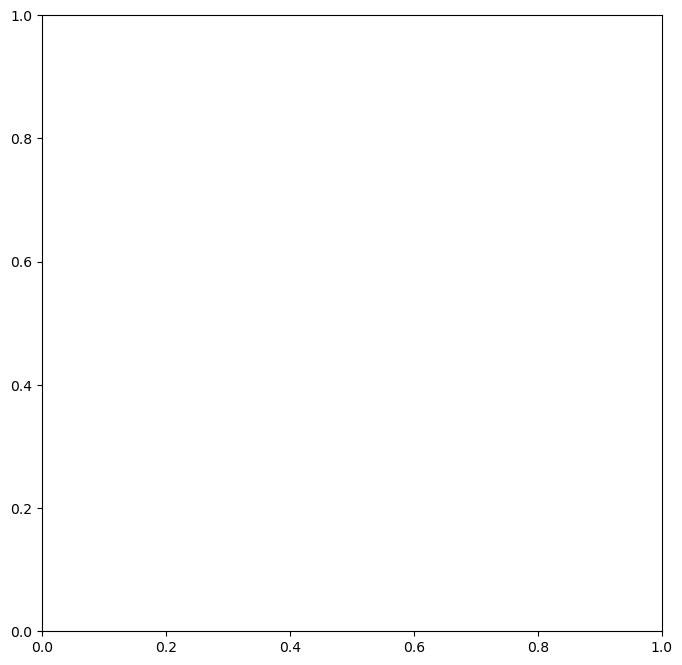

In [94]:
fig, ax = plt.subplots(figsize=(8, 8))
genre_col = ['navy', 'crimson']
explode = [0.1, 0] 

In [97]:
# Standardizing author names
if "Author" in df.columns:
    df.loc[df["Author"].str.strip() == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'

# Feature Engineering: Length of book title (excluding spaces)
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" "))

# Feature Engineering: Percentage of punctuation in book titles
punctuations = string.punctuation
def count_punc(text):
    count = sum(1 for char in text if char in punctuations)
    return round(count / (len(text) - text.count(" ")) * 100, 3)
    df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

In [99]:
# Explode the first slice (optional)

wedges, texts, autotexts = ax.pie(g_count.values, explode=explode, labels=g_count.index, autopct='%.2f%%',
                                  startangle=90, textprops={'size': 14}, colors=genre_col, pctdistance=0.85)


In [102]:
# Drop duplicate book names for better analysis
no_dup = df.drop_duplicates('Name')

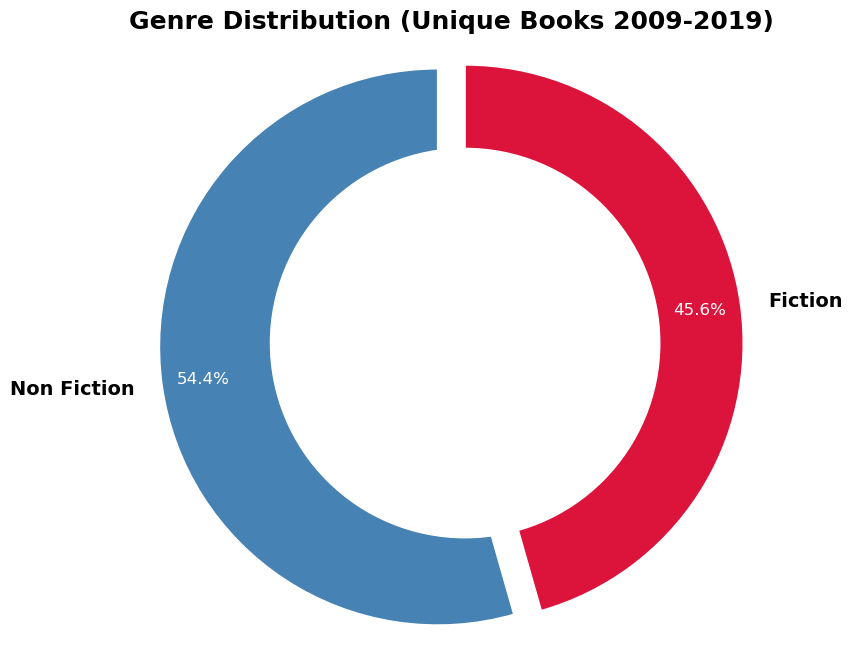

In [171]:
# Remove duplicate book names
no_dup = df.drop_duplicates('Name')

# Genre distribution
g_count = no_dup['Genre'].value_counts()

# Create a color palette
colors = ['#4682B4', '#DC143C']
explode = [0.1, 0]  # Emphasize the first slice

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    g_count.values, labels=g_count.index, autopct='%.1f%%', startangle=90, 
    textprops={'fontsize': 14}, colors=colors, explode=explode, pctdistance=0.85
)

# Customize wedge appearance
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1)

# Customize text appearance
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(14)
    text.set_fontweight('bold')
    autotext.set_fontsize(12)
    autotext.set_color('white')

# Add a central white circle
ax.add_artist(plt.Circle((0, 0), 0.7, color='white'))

# Set title
ax.set_title('Genre Distribution (Unique Books 2009-2019)', fontsize=18, fontweight='bold')
ax.axis('equal')

plt.show()


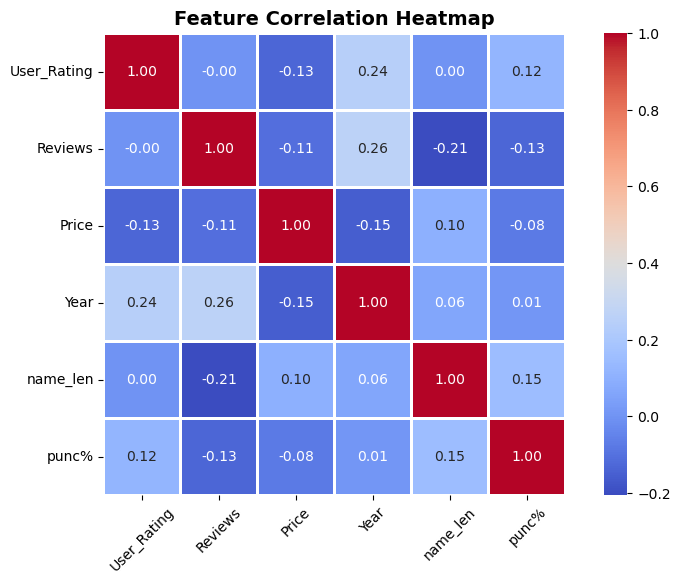

In [116]:
# 📊 HEATMAP: Correlation Between Features
plt.figure(figsize=(10, 6))  # Bigger figure size for readability

# Compute correlation for numerical features only
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

sns.heatmap(numeric_df.corr(), 
            annot=True, 
            cmap="coolwarm", 
            linewidths=1, 
            fmt=".2f", 
            square=True,  # Keep squares for better alignment
            cbar=True)  # Display color bar

plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.yticks(rotation=0)
plt.show()


In [132]:
!pip --version



pip 24.2 from C:\Users\KIIT\anaconda3\Lib\site-packages\pip (python 3.12)



In [134]:
!pip install wordcloud


In [135]:
!pip install seaborn matplotlib pandas


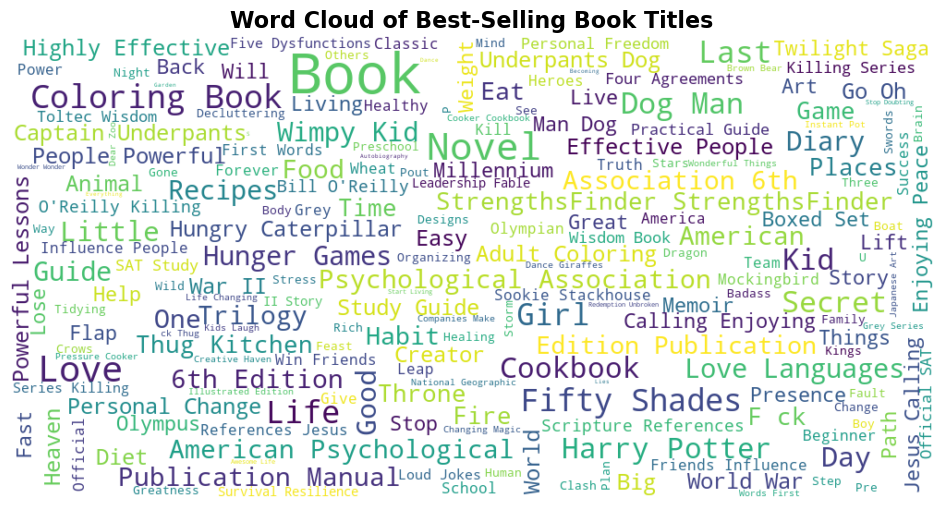

In [143]:
# 📊 **2️⃣ WORD CLOUD: Popular Book Titles**
from wordcloud import WordCloud

plt.figure(figsize=(12, 6))

# Generate word cloud while handling missing values
wordcloud = WordCloud(width=1000, height=500, 
                      background_color='white', 
                      colormap='viridis',  # Enhances visualization
                      max_font_size=60,    # Improves font scaling
                      random_state=42).generate(" ".join(df['Name'].dropna()))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Hide axis
plt.title("Word Cloud of Best-Selling Book Titles", fontsize=16, fontweight='bold')
plt.show()


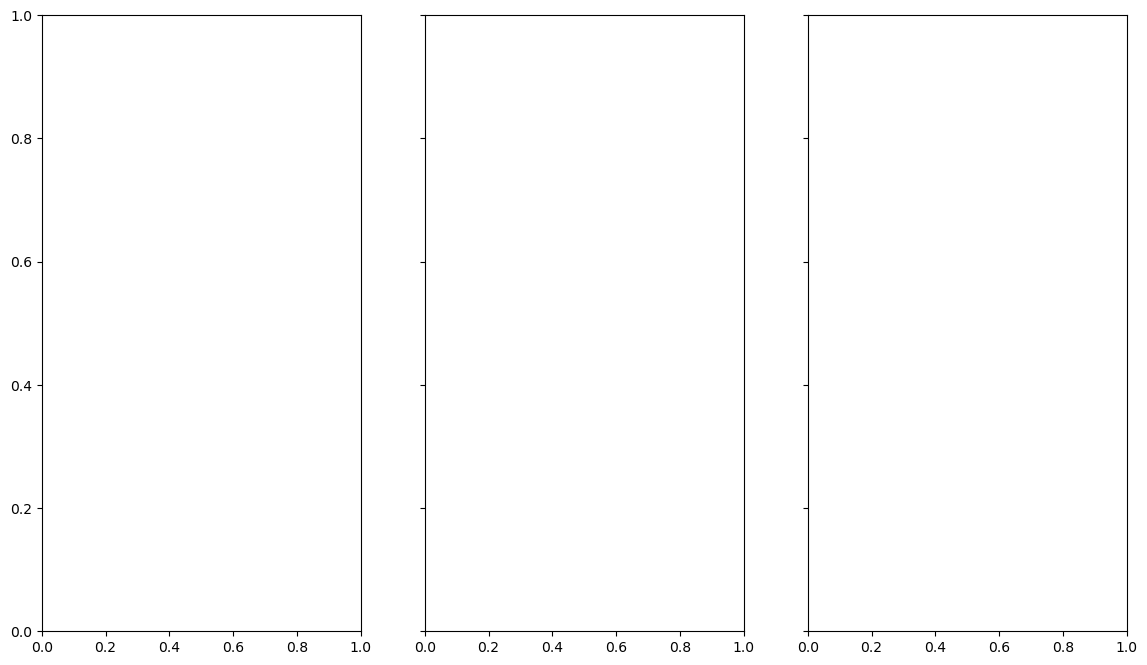

In [147]:
# **4️⃣ AUTHOR ANALYSIS: Top Authors & Their Reviews**
n_best = 20
top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name')

fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True)
color = sns.color_palette("hls", n_best)

In [149]:
# 1️⃣ Number of appearances in Best Sellers list
ax[0].hlines(y=top_authors.index, xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearances')
ax[0].set_xticks(np.arange(top_authors.values.max() + 1))

In [152]:

# 2️⃣ Unique Books by each Author
book_count = []
total_reviews = []

for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum() / 1000)

ax[1].hlines(y=top_authors.index, xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count) + 1))
ax[1].set_title('Unique books')

Text(0.5, 1.0, 'Unique books')

In [154]:
# 3️⃣ Total Reviews in Thousands
ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)

for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val + 2, name, val)

ax[2].set_xlabel("Total Reviews (in 1000's)")
plt.show()

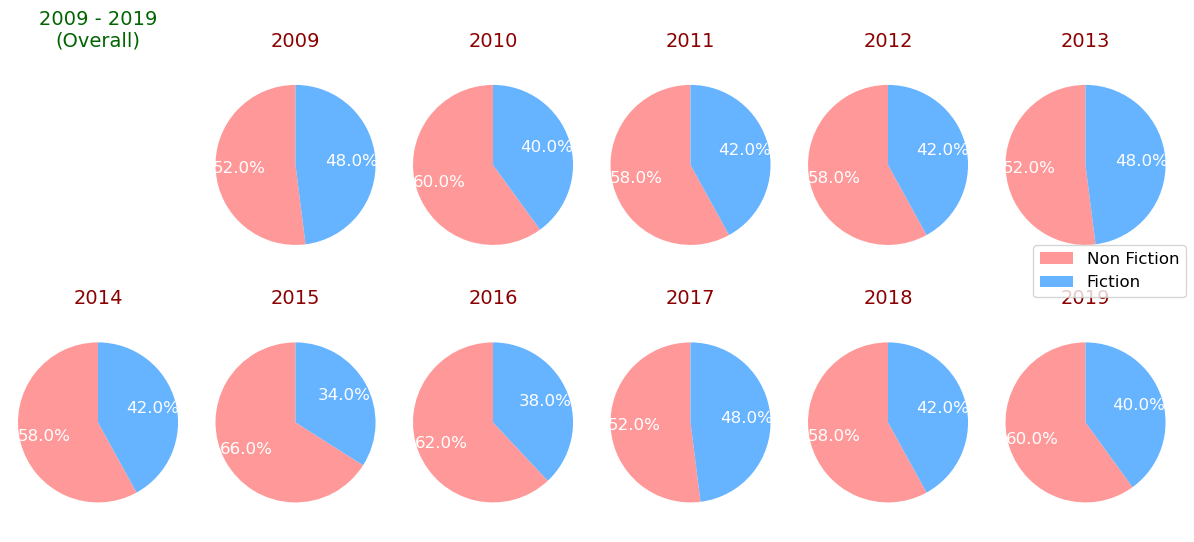

In [173]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12, 6))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Create a custom color palette for the pie charts
colors = ['#ff9999', '#66b3ff']

# Set the font size for the titles
title_fontsize = 14

# Iterate over the subplots and create the pie charts
for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()

    ax[0, i+1].pie(x=counts.values, labels=None, autopct='%.1f%%',
                   startangle=90, textprops={'size': 12, 'color': 'white'},
                   pctdistance=0.7, colors=colors, radius=1.1)

    ax[0, i+1].set_title(year, color='darkred', fontsize=title_fontsize)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()

    ax[1, i].pie(x=counts.values, labels=None, autopct='%.1f%%',
                 startangle=90, textprops={'size': 12, 'color': 'white'},
                 pctdistance=0.7, colors=colors, radius=1.1)

    ax[1, i].set_title(year, color='darkred', fontsize=title_fontsize)

# Set the title and font size for the overall chart
overall_title = ax[0, 0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontsize=title_fontsize)

# Create a legend for the genres
fig.legend(g_count.index, loc='center right', fontsize=12)

# Remove unnecessary spines and labels
for row in ax:
    for col in row:
        col.axis('equal')
        col.spines['top'].set_visible(False)
        col.spines['right'].set_visible(False)
        col.spines['bottom'].set_visible(False)
        col.spines['left'].set_visible(False)
        col.set_xticks([])
        col.set_yticks([])

# Adjust the position of the subplots and title
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

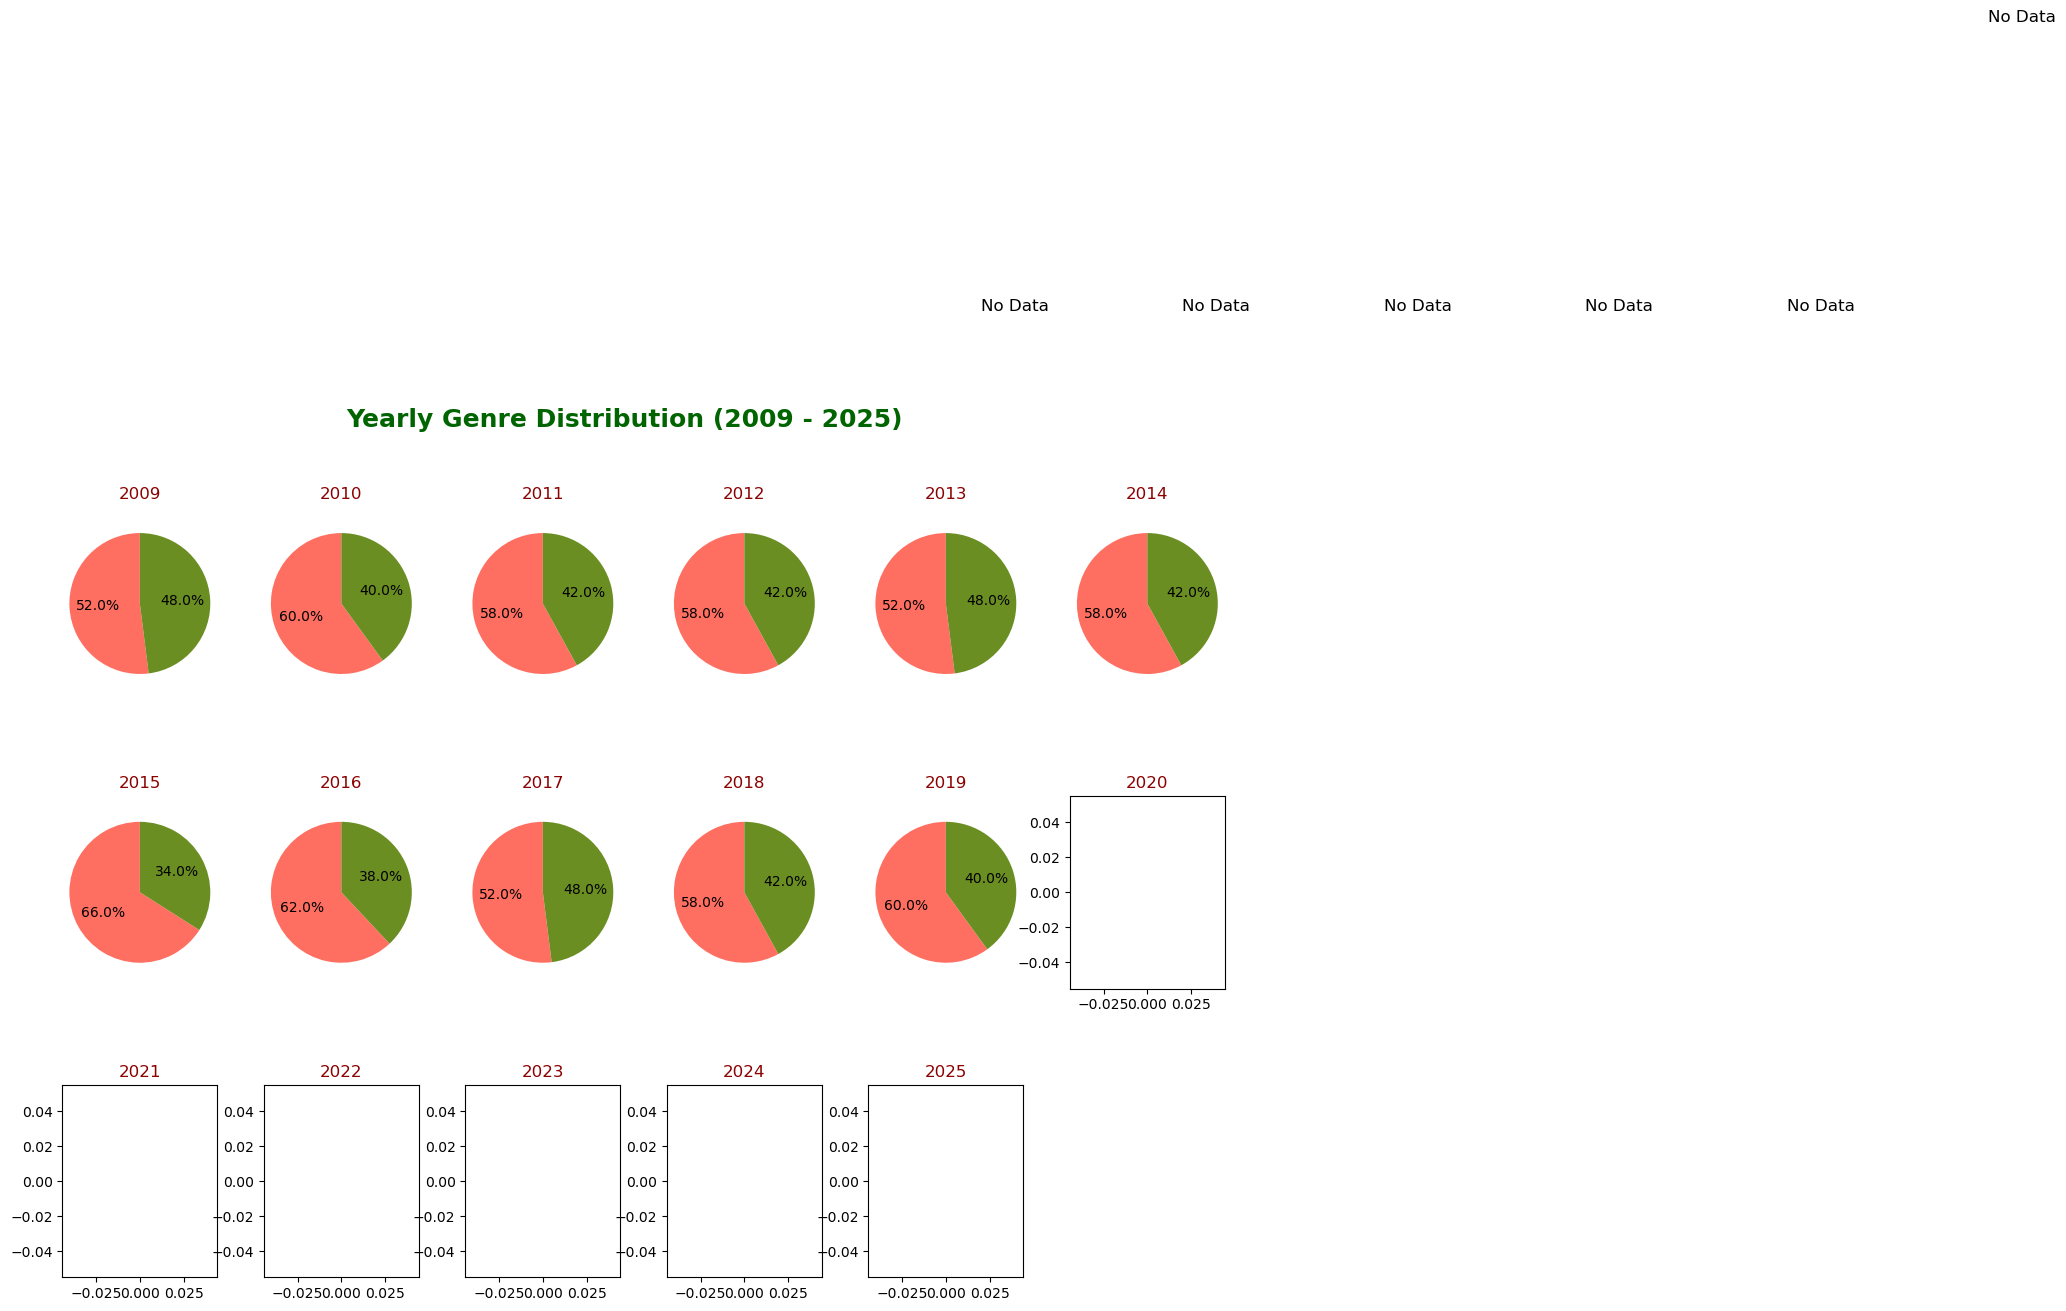

In [176]:
years = np.arange(2009, 2026)  # Full range

# Create subplots
fig, axes = plt.subplots(3, 6, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the 2D axes array
axes = axes.flatten()

# Define colors
colors = ['#FF6F61', '#6B8E23']

# Generate pie charts
for i, year in enumerate(years):
    ax = axes[i]
    counts = df[df['Year'] == year]['Genre'].value_counts()
    
    if not counts.empty:
        ax.pie(counts, autopct='%.1f%%', colors=colors, startangle=90, textprops={'fontsize': 10})
    else:
        ax.text(0.5, 0.5, "No Data", ha='center', va='center', fontsize=12)
    
    ax.set_title(year, fontsize=12, color='darkred')
    ax.axis('equal')  # Keep pie charts circular

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Add main title
plt.suptitle('Yearly Genre Distribution (2009 - 2025)', fontsize=18, fontweight='bold', color='darkgreen')

plt.show()


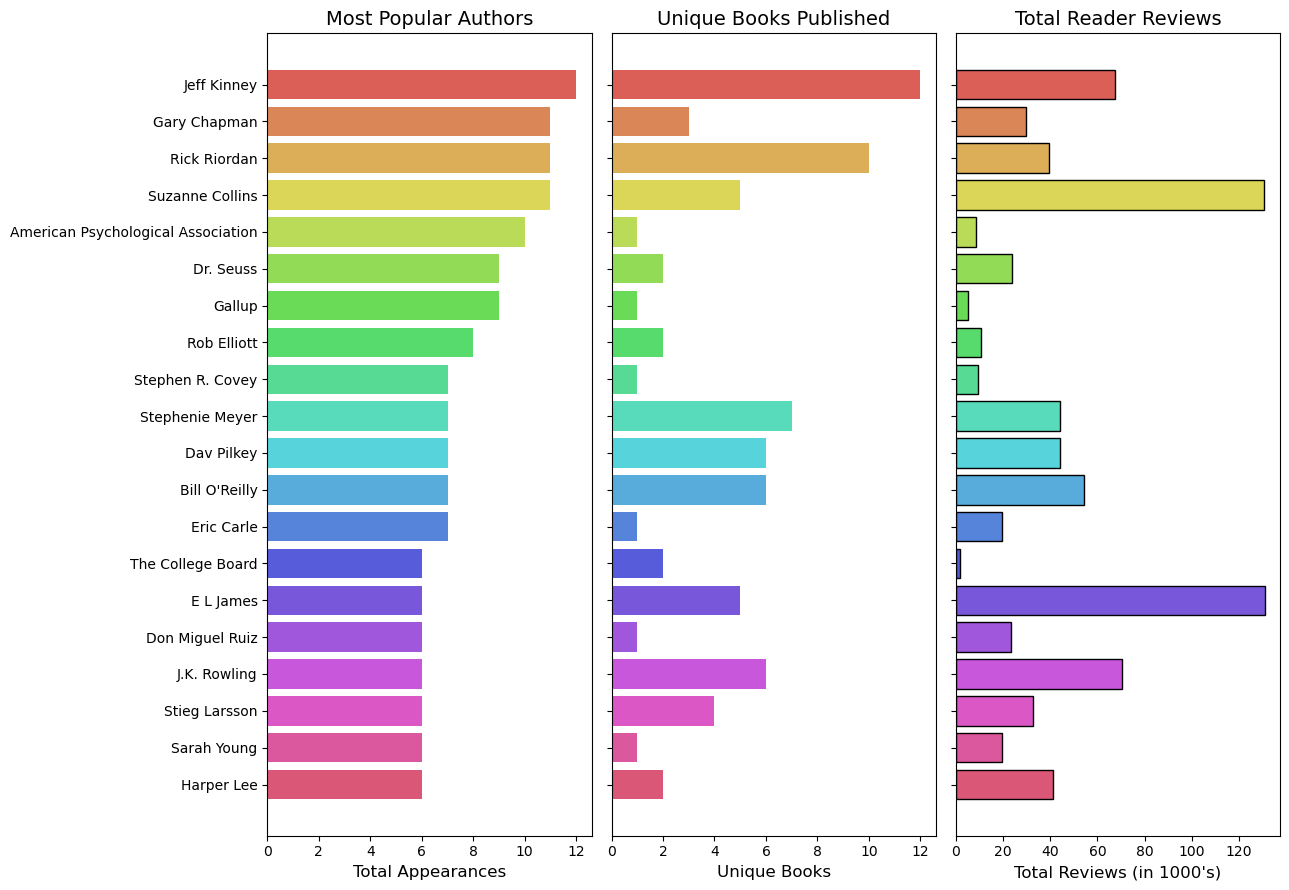

In [178]:
# Top 20 authors
n_best = 20
top_authors = df.Author.value_counts().nlargest(n_best)

# Remove duplicates for unique book count
no_dup = df.drop_duplicates('Name')

# Initialize lists
book_count, total_reviews = [], []

# Extract book count & review count for each top author
for name in top_authors.index:
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum() / 1000)  # Convert to 1000s

# Set colors
colors = sns.color_palette("hls", n_best)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(13, 9), sharey=True)

# Appearance count
ax[0].barh(top_authors.index, top_authors.values, color=colors)
ax[0].set_xlabel('Total Appearances', fontsize=12)
ax[0].set_title('Most Popular Authors', fontsize=14)
ax[0].invert_yaxis()

# Unique book count
ax[1].barh(top_authors.index, book_count, color=colors)
ax[1].set_xlabel('Unique Books', fontsize=12)
ax[1].set_title('Unique Books Published', fontsize=14)

# Total reviews
ax[2].barh(top_authors.index, total_reviews, color=colors, edgecolor='black')
ax[2].set_xlabel("Total Reviews (in 1000's)", fontsize=12)
ax[2].set_title('Total Reader Reviews', fontsize=14)

plt.tight_layout()
plt.show()


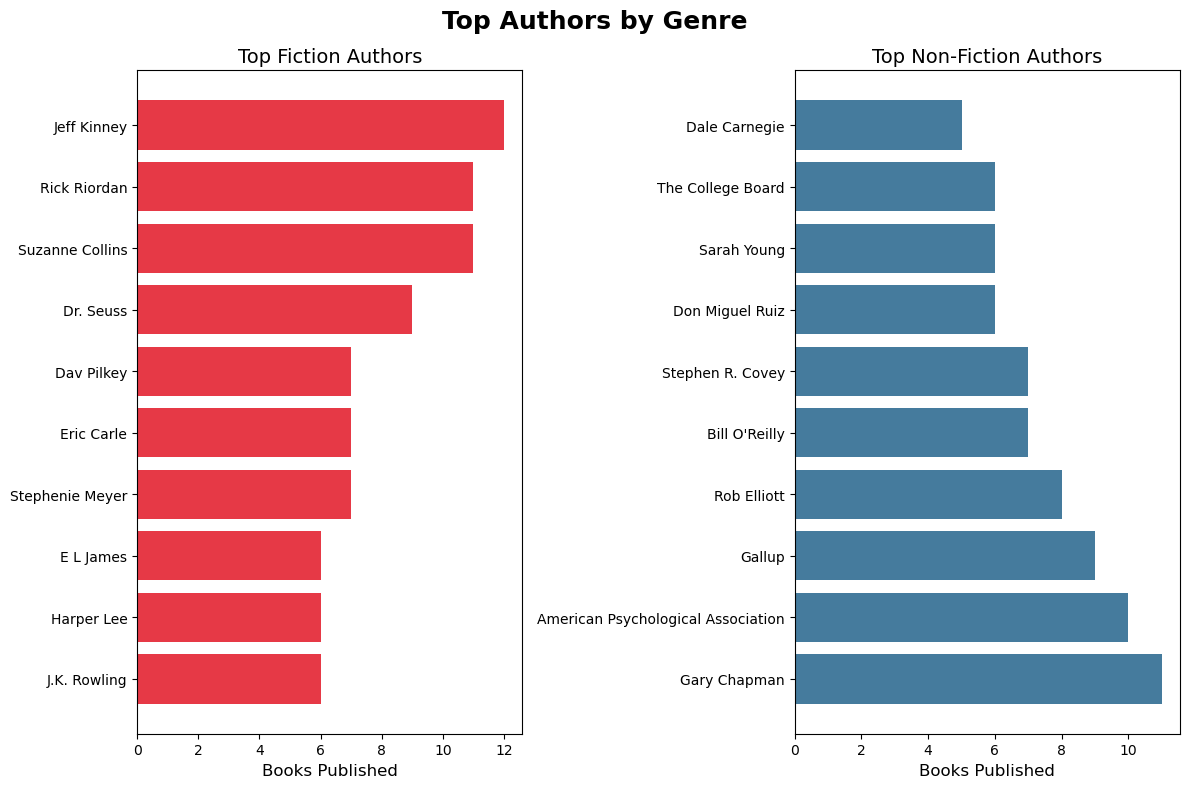

In [180]:
# Group by Author & Genre
st_nf_authors = df.groupby(['Author', 'Genre'])['Name'].count().unstack().fillna(0)

# Select top 10 for both Fiction & Non-Fiction
best_fiction_authors = st_nf_authors['Fiction'].nlargest(10)
best_nonfiction_authors = st_nf_authors['Non Fiction'].nlargest(10)

# Create figure
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Custom colors
colors = ['#E63946', '#457B9D']

# Fiction
ax[0].barh(best_fiction_authors.index, best_fiction_authors.values, color=colors[0])
ax[0].set_xlabel('Books Published', fontsize=12)
ax[0].set_title('Top Fiction Authors', fontsize=14)
ax[0].invert_yaxis()

# Non-Fiction
ax[1].barh(best_nonfiction_authors.index, best_nonfiction_authors.values, color=colors[1])
ax[1].set_xlabel('Books Published', fontsize=12)
ax[1].set_title('Top Non-Fiction Authors', fontsize=14)

# Overall styling
fig.suptitle('Top Authors by Genre', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

In [204]:
df = pd.DataFrame({
    'Book_Title': ['Book A', 'Book B', 'Book C', 'Book D', 'Book E'],
    'Predicted_Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative'],
    'Actual_Sentiment': ['Positive', 'Negative', 'Neutral', 'Negative', 'Negative']
})

# Calculate accuracy
accuracy = accuracy_score(df['Actual_Sentiment'], df['Predicted_Sentiment'])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.00%
